In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

In [14]:
import requests

url = "https://iex.lewagon.com/stable/stock/aapl/chart/3m"
api_data = requests.get(url).json()

apple_df = pd.DataFrame(api_data)
apple_df

,close,high,low,open,symbol,volume,id,key,subkey,date,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,priceDate
0,167.40,167.8200,163.9100,165.02,AAPL,67723833,HISTORICAL_PRICES,AAPL,,2022-04-19,...,67723833,164.7779,167.1544,167.5738,163.6695,67723833,"Apr 19, 22",0.00,0.0000,NaN
1,167.23,168.8800,166.1000,168.76,AAPL,67929814,HISTORICAL_PRICES,AAPL,,2022-04-20,...,67929814,168.5124,166.9847,168.6322,165.8563,67929814,"Apr 20, 22",-0.17,-0.0010,NaN
2,166.42,171.5300,165.9100,168.91,AAPL,87227768,HISTORICAL_PRICES,AAPL,,2022-04-21,...,87227768,168.6622,166.1758,171.2783,165.6666,87227768,"Apr 21, 22",-0.81,-0.0048,NaN
3,161.79,167.8699,161.5000,166.46,AAPL,84882424,HISTORICAL_PRICES,AAPL,,2022-04-22,...,84882424,166.2158,161.5526,167.6236,161.2631,84882424,"Apr 22, 22",-4.63,-0.0278,NaN
4,162.88,163.1700,158.4600,161.12,AAPL,96046376,HISTORICAL_PRICES,AAPL,,2022-04-25,...,96046376,160.8836,162.6410,162.9306,158.2275,96046376,"Apr 25, 22",1.09,0.0067,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,145.86,148.4500,145.0500,145.76,AAPL,77588759,HISTORICAL_PRICES,AAPL,,2022-07-12,...,77588759,145.7600,145.8600,148.4500,145.0500,77588759,"Jul 12, 22",0.99,0.0068,2022-07-12
58,145.49,146.4500,142.1201,142.99,AAPL,71185560,HISTORICAL_PRICES,AAPL,,2022-07-13,...,71185560,142.9900,145.4900,146.4500,142.1201,71185560,"Jul 13, 22",-0.37,-0.0025,2022-07-13
59,148.47,148.9500,143.2500,144.08,AAPL,78140744,HISTORICAL_PRICES,AAPL,,2022-07-14,...,78140744,144.0800,148.4700,148.9500,143.2500,78140744,"Jul 14, 22",2.98,0.0205,2022-07-14
60,150.17,150.8600,148.2000,149.78,AAPL,76259931,HISTORICAL_PRICES,AAPL,,2022-07-15,...,76259931,149.7800,150.1700,150.8600,148.2000,76259931,"Jul 15, 22",1.70,0.0115,2022-07-15


In [20]:
apple_df['date'] = pd.to_datetime(apple_df['date'])
apple_df = apple_df.set_index('date')

<AxesSubplot:xlabel='date'>

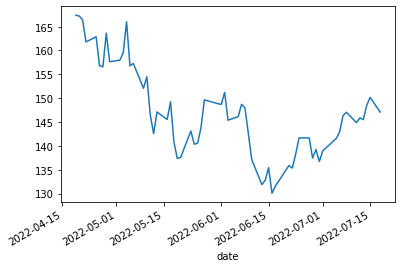

In [21]:
apple_df['close'].plot()

<AxesSubplot:xlabel='date'>

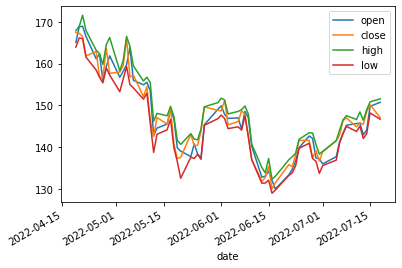

In [22]:
apple_df[['open', 'close', 'high', 'low']].plot()

<AxesSubplot:xlabel='date'>

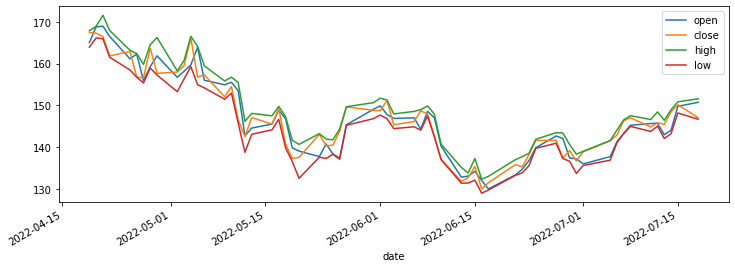

In [23]:
apple_df[['open', 'close', 'high', 'low']].plot(figsize=(12,4))

In [24]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/02-Data-Toolkit/02-Data-Sourcing/01-Stock-Market-API/tests
plugins: dash-1.19.0
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.33s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



In [15]:

symbols = ['goog','aapl','fb','amzn']
stocks = pd.DataFrame()

for sym in symbols:
    df = pd.DataFrame(requests.get(f"https://iex.lewagon.com/stable/stock/{sym}/chart/1y").json())
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df = df.rename(columns={'close': sym})
    df = df[sym]
    stocks = pd.concat([stocks, df], axis=1)
    
stocks

,goog,aapl,fb,amzn
2021-07-19,129.2540,142.45,336.95,177.4795
2021-07-20,131.1015,146.15,341.66,178.6595
2021-07-21,132.6005,145.40,346.23,179.2600
2021-07-22,133.3285,146.80,351.19,181.9015
2021-07-23,137.8160,148.56,369.79,182.8320
...,...,...,...,...
2022-07-12,114.8495,145.86,NaN,109.2200
2022-07-13,112.1870,145.49,NaN,110.4000
2022-07-14,111.4400,148.47,NaN,110.6300
2022-07-15,112.7670,150.17,NaN,113.5500


In [23]:
pd.options.plotting.backend = "plotly"

stocks.plot(x=stocks.index, y=stocks.columns, height=600, title='GAFA Stocks')